In [320]:
import pandas as pd
import phik
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [321]:
train = pd.read_csv("train.csv")
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [215]:
train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [322]:
test = pd.read_csv("test.csv")
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [217]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [218]:
cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = train[cols]
y = train["Exited"]

In [219]:
model = LogisticRegression()
model.fit(X, y)

test_cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
y_pred = model.predict(test[test_cols])
y_pred

/Users/applebro/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [220]:
y_prob = model.predict_proba(test[test_cols])
y_prob

array([[0.81378286, 0.18621714],
       [0.84549824, 0.15450176],
       [0.83422909, 0.16577091],
       ...,
       [0.86480223, 0.13519777],
       [0.84742912, 0.15257088],
       [0.76849381, 0.23150619]])

ROC-AUC Score: 0.5


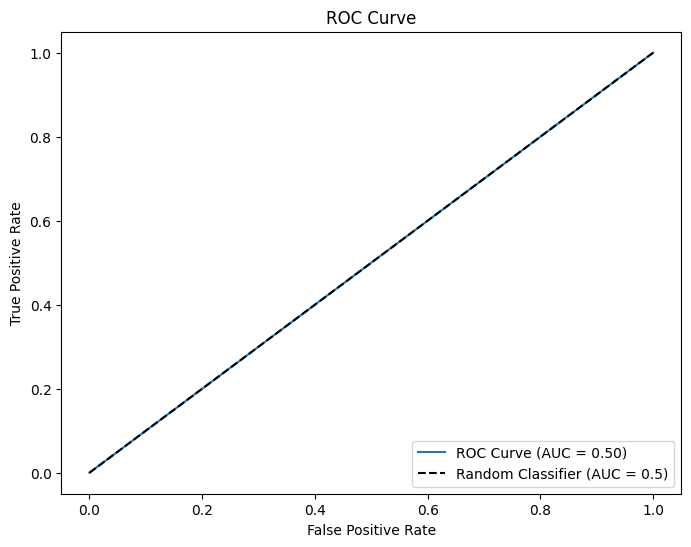

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y[:110023], y_pred)
print("ROC-AUC Score:", roc_auc)

# Generate data for ROC curve
fpr, tpr, thresholds = roc_curve(y[:110023], y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Phik

/Users/applebro/Library/Python/3.9/lib/python/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2797. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


interval columns not set, guessing: ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


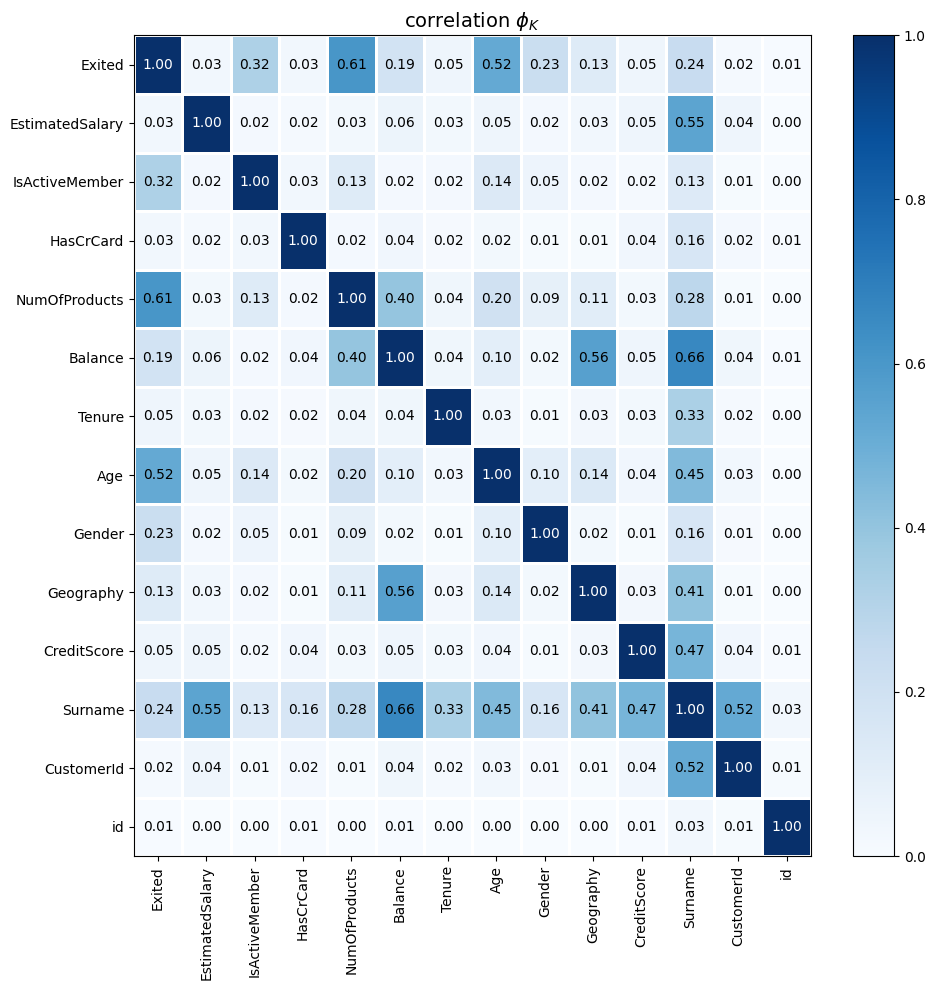

In [63]:
phik_overview = train.phik_matrix()

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(10,10))
plt.tight_layout()

In [64]:
phik_overview

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,1.000000,0.010882,0.033179,0.007760,0.000000,0.002231,0.000000,0.000000,0.007086,0.000382,0.006488,0.000000,0.000000,0.006477
CustomerId,0.010882,1.000000,0.520039,0.035770,0.010678,0.012765,0.033878,0.018415,0.040632,0.009511,0.020721,0.008903,0.043853,0.018113
Surname,0.033179,0.520039,1.000000,0.472652,0.409580,0.160533,0.446364,0.334644,0.662431,0.277860,0.163699,0.129240,0.546232,0.239326
CreditScore,0.007760,0.035770,0.472652,1.000000,0.031061,0.008456,0.036709,0.025608,0.047280,0.026427,0.037877,0.017424,0.047571,0.048688
Geography,0.000000,0.010678,0.409580,0.031061,1.000000,0.023764,0.142954,0.029232,0.559024,0.111706,0.009876,0.022023,0.034919,0.127751
Gender,0.002231,0.012765,0.160533,0.008456,0.023764,1.000000,0.100415,0.011293,0.024131,0.086019,0.009287,0.052786,0.020706,0.227953
Age,0.000000,0.033878,0.446364,0.036709,0.142954,0.100415,1.000000,0.031983,0.098499,0.199934,0.023919,0.138147,0.047875,0.521917
Tenure,0.000000,0.018415,0.334644,0.025608,0.029232,0.011293,0.031983,1.000000,0.040571,0.041085,0.015180,0.021014,0.025769,0.049479
Balance,0.007086,0.040632,0.662431,0.047280,0.559024,0.024131,0.098499,0.040571,1.000000,0.397316,0.036160,0.022327,0.057123,0.189029
NumOfProducts,0.000382,0.009511,0.277860,0.026427,0.111706,0.086019,0.199934,0.041085,0.397316,1.000000,0.020364,0.126545,0.026144,0.607392


## Mutual Information


In [65]:
df = train.dropna()


X = df.copy()
y = X.pop('Exited')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == np.int64

from sklearn.feature_selection import mutual_info_regression

X = X.dropna()

def make_mi_score(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_score(X, y, discrete_features)
mi_scores[::3]

NumOfProducts    0.093408
Geography        0.020416
Balance          0.014560
HasCrCard        0.000927
id               0.000000
Name: MI Scores, dtype: float64

In [66]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

X = X.dropna()

def make_mi_score(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_score(X, y, discrete_features)
mi_scores[::3]

NumOfProducts     0.089766
IsActiveMember    0.020639
Gender            0.009515
CreditScore       0.002684
id                0.000377
Name: MI Scores, dtype: float64

In [74]:


for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

y = train['Exited_bool']

def make_mi_classification(X, y):
  mi_class = mutual_info_classif(X, y)
  mi_class = pd.Series(mi_class, name="MI Scores(Classifiction)", index=X.columns)
  mi_class = mi_class.sort_values(ascending=False)
  return mi_class

mi_class = make_mi_classification(X, y)
mi_class[::3]

NumOfProducts    0.099654
HasCrCard        0.024953
Surname          0.017621
CreditScore      0.003720
CustomerId       0.000000
Name: MI Scores(Classifiction), dtype: float64

## correlations

ROC-AUC Score: 0.6078327809087195


/Users/applebro/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


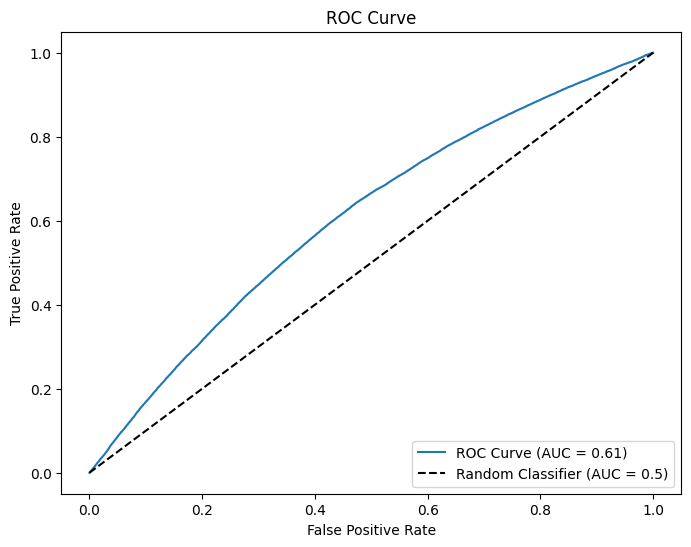

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# WoE

In [287]:
def WoE(df, X, y):
    df2 = df.groupby(X)[y].value_counts().unstack().rename(columns = {0: '# of non-events', 1: "# of events"})
    df2['Percentage non-events'] = df2['# of non-events'] / (df2['# of non-events'].sum())
    df2['Percentage events'] = df2['# of events'] / (df2['# of events'].sum())
    df2['WoE'] = np.log(df2['Percentage events'] / df2['Percentage non-events'])
    return df2

In [288]:
data = WoE(df, "Tenure", "Exited").sort_values(['WoE'])
data

Exited,# of non-events,# of events,Percentage non-events,Percentage events,WoE
Tenure,,,,,
7,14469,3341,0.111203,0.095673,-0.150423
2,14529,3516,0.111664,0.100684,-0.103508
8,14052,3468,0.107998,0.099310,-0.083872
6,12677,3145,0.097431,0.090060,-0.078661
9,13165,3544,0.101181,0.101486,0.003009
10,4652,1257,0.035754,0.035996,0.006746
5,13468,3800,0.103510,0.108817,0.050000
1,12970,3790,0.099683,0.108531,0.085042
4,13580,3974,0.104371,0.113800,0.086490


In [323]:
# Sample function to calculate WoE
def WoE(df, X, y):
    df2 = df.groupby(X)[y].value_counts().unstack().rename(columns={0: '# of non-events', 1: '# of events'})
    df2['Percentage non-events'] = df2['# of non-events'] / df2['# of non-events'].sum()
    df2['Percentage events'] = df2['# of events'] / df2['# of events'].sum()
    df2['WoE'] = np.log(df2['Percentage events'] / df2['Percentage non-events'])
    return df2

# Calculate WoE and store in a DataFrame
woe_table = WoE(train, "Geography", "Exited")

# Create a dictionary to map Geography to WoE values
woe_mapping = woe_table['WoE'].to_dict()

# Add a new column in df with mapped WoE values for each Geography
train['Geography_WoE'] = train['Geography'].map(woe_mapping)
test['Geography_WoE'] = test['Geography'].map(woe_mapping)

# Check the updated DataFrame
train[['Geography', 'Geography_WoE']].head()

test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,-0.304129
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,-0.304129
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,-0.304129
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,-0.304129
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.821315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,-0.254970
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,-0.304129
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,-0.304129
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,-0.304129


In [324]:

# Calculate WoE for the Tenure column and store it in a DataFrame
woe_table_tenure = WoE(train, "Tenure", "Exited")

# Create a dictionary to map Tenure to WoE values
woe_mapping_tenure = woe_table_tenure['WoE'].to_dict()

# Add a new column in train and test with mapped WoE values for each Tenure value
train['Tenure_WoE'] = train['Tenure'].map(woe_mapping_tenure)
test['Tenure_WoE'] = test['Tenure'].map(woe_mapping_tenure)

test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE,Tenure_WoE
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,-0.304129,-0.103508
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,-0.304129,-0.103508
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,-0.304129,-0.150423
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,-0.304129,-0.083872
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.821315,0.006746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,-0.254970,-0.150423
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,-0.304129,0.086490
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,-0.304129,-0.103508
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,-0.304129,0.101938


In [325]:
train['Gender_coding'] = train['Gender'].map({'Male': 0, 'Female': 1})
test['Gender_coding'] = test['Gender'].map({'Male': 0, 'Female': 1})
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE,Tenure_WoE,Gender_coding
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,-0.304129,-0.103508,1
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,-0.304129,-0.103508,1
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,-0.304129,-0.150423,1
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,-0.304129,-0.083872,0
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.821315,0.006746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,-0.254970,-0.150423,0
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,-0.304129,0.086490,1
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,-0.304129,-0.103508,0
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,-0.304129,0.101938,1


In [344]:
cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_WoE', 'Gender_coding', 'Tenure_WoE']
train_key = train.drop(columns=['id', 'CustomerId', 'Surname', 'Geography', 'Gender'])
test_key = test.drop(columns=['id', 'CustomerId', 'Surname', 'Geography', 'Gender'])
train_key

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE,Tenure_WoE,Gender_coding,Age_Cat
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,-0.304129,0.101938,0,-1.066051
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,-0.304129,0.085042,0,-1.066051
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,-0.304129,0.006746,0,0.012582
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,-0.304129,-0.103508,0,-0.808324
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,-0.254970,0.050000,0,-1.066051
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,-0.254970,-0.103508,1,-1.066051
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,-0.304129,0.101938,0,-0.808324
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,-0.304129,0.050000,0,-1.066051
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,-0.254970,-0.150423,1,-1.066051


ROC-AUC Score: 1.0


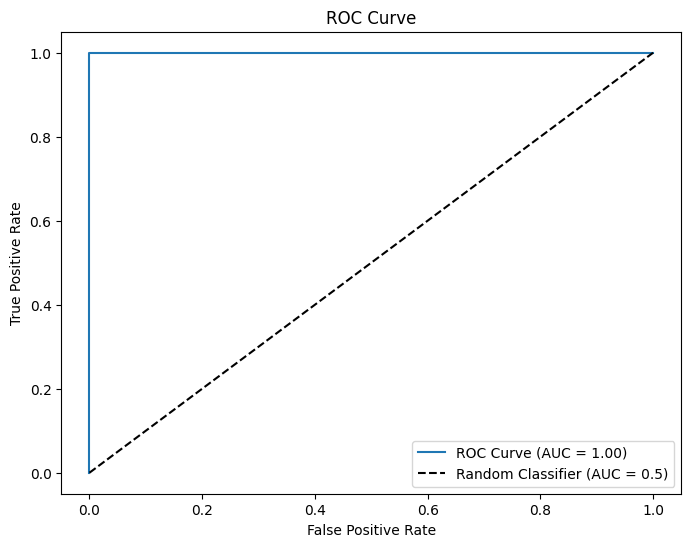

In [243]:
# Train a logistic regression model
def roc_auc_calculate(X, y = train["Exited"]):
    model = RidgeClassifier()
    model.fit(X, y)

    # Get predicted probabilities for the positive class
    y_pred_proba = model.predict(X)

    # Calculate the ROC-AUC score
    roc_auc = roc_auc_score(y, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)

    # Generate ROC curve data
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

roc_auc_calculate(train_key)

## Creating new Features


In [293]:
# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(train[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_train = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
train = pd.concat([train, poly_train], axis=1)

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
test = pd.concat([test, poly_test_df], axis=1)

train['Balance_to_Salary'] = train['Balance'] / train['EstimatedSalary']
train['Tenure_to_Age'] = train['Tenure'] / train['Age']
train['CreditScore_to_Age'] = train['CreditScore'] / train['Age']
train['Balance_NumOfProducts'] = train['Balance'] * train['NumOfProducts']
train['CreditScore_IsActive'] = train['CreditScore'] * train['IsActiveMember']

test['Balance_to_Salary'] = test['Balance'] / test['EstimatedSalary']
test['Tenure_to_Age'] = test['Tenure'] / test['Age']
test['CreditScore_to_Age'] = test['CreditScore'] / test['Age']
test['Balance_NumOfProducts'] = test['Balance'] * test['NumOfProducts']
test['CreditScore_IsActive'] = test['CreditScore'] * test['IsActiveMember']

train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,poly_2,poly_3,poly_4,poly_5,poly_6,Balance_to_Salary,Tenure_to_Age,CreditScore_to_Age,Balance_NumOfProducts,CreditScore_IsActive
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,...,33.0,0.00,22044.0,0.00,0.00,0.000000,0.090909,20.242424,0.00,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,...,33.0,0.00,20691.0,0.00,0.00,0.000000,0.030303,19.000000,0.00,627.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,...,40.0,0.00,27120.0,0.00,0.00,0.000000,0.250000,16.950000,0.00,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,...,34.0,148882.54,19754.0,86500755.74,5062006.36,1.760655,0.058824,17.088235,148882.54,581.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,...,33.0,0.00,23628.0,0.00,0.00,0.000000,0.151515,21.696970,0.00,716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,...,33.0,0.00,22011.0,0.00,0.00,0.000000,0.060606,20.212121,0.00,667.0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,...,35.0,0.00,27720.0,0.00,0.00,0.000000,0.085714,22.628571,0.00,0.0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,...,31.0,0.00,17515.0,0.00,0.00,0.000000,0.161290,18.225806,0.00,565.0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,...,30.0,161533.00,16620.0,89489282.00,4845990.00,2.269582,0.233333,18.466667,161533.00,554.0


In [195]:
#train = train.drop(columns=['CustomerId', 'id'])
test = test.drop(columns=['CustomerId', 'id'])

# WoE for numeric columns

In [327]:
def WoE_v2(data, feature_name, target_name):
    df = data.copy()
    
    # Group by the feature and calculate the count of events and non-events
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})
    
    # Calculate percentages
    woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    
    # Calculate WoE
    woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    
    # Add total observations and their percentage
    woe_table['Total Observations'] = woe_table['# of events'] + woe_table['# of non-events']
    woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)

    return woe_table.reset_index()

In [328]:
train['Age_Cat'] = pd.qcut(train['Age'], q=10)
# train['Age_Cat'] = pd.cut(train['Age'], bins=10)
test['Age_Cat'] = pd.qcut(test['Age'], q=10)
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_WoE,Tenure_WoE,Gender_coding,Age_Cat
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,-0.304129,0.101938,0,"(31.0, 33.0]"
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,-0.304129,0.085042,0,"(31.0, 33.0]"
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,-0.304129,0.006746,0,"(39.0, 41.0]"
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,-0.304129,-0.103508,0,"(33.0, 35.0]"
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,-0.254970,0.050000,0,"(31.0, 33.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,-0.254970,-0.103508,1,"(31.0, 33.0]"
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,-0.304129,0.101938,0,"(33.0, 35.0]"
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,-0.304129,0.050000,0,"(28.0, 31.0]"
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,-0.254970,-0.150423,1,"(28.0, 31.0]"


In [357]:
train['CreditScore_cat'] = pd.qcut(train['CreditScore'], q=10)
# train['Age_Cat'] = pd.cut(train['Age'], bins=10)
test['CreditScore_cat'] = pd.qcut(test['CreditScore'], q=10)
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE,Tenure_WoE,Gender_coding,Age_Cat,Exited,CreditScore_cat
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,-0.304129,0.101938,0,-1.066051,0,"(659.0, 681.0]"
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,-0.304129,0.085042,0,-1.066051,0,"(613.0, 638.0]"
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,-0.304129,0.006746,0,0.012582,0,"(659.0, 681.0]"
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,-0.304129,-0.103508,0,-0.808324,0,"(554.0, 587.0]"
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,-0.254970,0.050000,0,-1.066051,0,"(701.0, 721.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,-0.254970,-0.103508,1,-1.066051,0,"(659.0, 681.0]"
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,-0.304129,0.101938,0,-0.808324,0,"(754.0, 850.0]"
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,-0.304129,0.050000,0,-1.066051,0,"(554.0, 587.0]"
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,-0.254970,-0.150423,1,-1.066051,0,"(349.999, 554.0]"


In [329]:
train['Age_Cat'] = pd.cut(train['Age'], bins=[0, 33, 37, 39, 41, 44, 92])
test['Age_Cat'] = pd.cut(test['Age'], bins=[0, 33, 37, 39, 41, 44, 92])

train['Age_Cat'] = pd.cut(train['Age'], bins=[0, 33, 37, 39, 41, 44, 92])
test['Age_Cat'] = pd.cut(test['Age'], bins=[0, 33, 37, 39, 41, 44, 92])

In [330]:
df_woe = WoE_v2(train, 'Age_Cat','Exited')
df_woe

/var/folders/66/x0152m9s4fxg2fz8tfrrqlc80000gp/T/ipykernel_18877/3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,Age_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(0, 33]",47639,4403,0.126085,0.366136,-1.066051,52042,31.534
1,"(33, 37]",31757,3798,0.108760,0.244072,-0.808324,35555,21.544
2,"(37, 39]",14626,2564,0.073423,0.112410,-0.425917,17190,10.416
3,"(39, 41]",11325,3078,0.088142,0.087040,0.012582,14403,8.727
4,"(41, 44]",9655,4513,0.129235,0.074205,0.554801,14168,8.585
5,"(44, 92]",15111,16565,0.474356,0.116138,1.407184,31676,19.194


In [354]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE,Tenure_WoE,Gender_coding,Age_Cat
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,-0.304129,0.101938,0,-1.066051
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,-0.304129,0.085042,0,-1.066051
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,-0.304129,0.006746,0,0.012582
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,-0.304129,-0.103508,0,-0.808324
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,-0.254970,0.050000,0,-1.066051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,-0.254970,-0.103508,1,-1.066051
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,-0.304129,0.101938,0,-0.808324
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,-0.304129,0.050000,0,-1.066051
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,-0.254970,-0.150423,1,-1.066051


In [359]:
df_woe = WoE_v2(train, 'CreditScore_cat','Exited')
df_woe

/var/folders/66/x0152m9s4fxg2fz8tfrrqlc80000gp/T/ipykernel_18877/3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,CreditScore_cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(349.999, 554.0]",13268,4220,0.120844,0.101973,0.169795,17488,10.597
1,"(554.0, 587.0]",12251,3566,0.102116,0.094157,0.081152,15817,9.584
2,"(587.0, 613.0]",12922,3500,0.100226,0.099314,0.009147,16422,9.951
3,"(613.0, 638.0]",12910,3805,0.108960,0.099221,0.093629,16715,10.128
4,"(638.0, 659.0]",12613,3627,0.103863,0.096939,0.068993,16240,9.840
5,"(659.0, 681.0]",13541,3155,0.090347,0.104071,-0.141419,16696,10.117
6,"(681.0, 701.0]",13249,3031,0.086796,0.101827,-0.159715,16280,9.865
7,"(701.0, 721.0]",13421,3138,0.089860,0.103149,-0.137920,16559,10.034
8,"(721.0, 754.0]",13122,3625,0.103806,0.100851,0.028879,16747,10.148
9,"(754.0, 850.0]",12816,3254,0.093182,0.098499,-0.055494,16070,9.737


In [190]:
train['Age_Cat'].value_counts(normalize=True).sort_index()*100

Age_Cat
(0, 33]     31.534108
(33, 37]    21.544045
(37, 39]    10.416035
(39, 41]     8.727293
(41, 44]     8.584898
(44, 92]    19.193621
Name: proportion, dtype: float64

Exited,CreditScore_cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(349.999, 554.0]",13268,4220,0.120844,0.101973,0.169795,17488,10.597
1,"(554.0, 587.0]",12251,3566,0.102116,0.094157,0.081152,15817,9.584
2,"(587.0, 613.0]",12922,3500,0.100226,0.099314,0.009147,16422,9.951
3,"(613.0, 638.0]",12910,3805,0.108960,0.099221,0.093629,16715,10.128
4,"(638.0, 659.0]",12613,3627,0.103863,0.096939,0.068993,16240,9.840
5,"(659.0, 681.0]",13541,3155,0.090347,0.104071,-0.141419,16696,10.117
6,"(681.0, 701.0]",13249,3031,0.086796,0.101827,-0.159715,16280,9.865
7,"(701.0, 721.0]",13421,3138,0.089860,0.103149,-0.137920,16559,10.034
8,"(721.0, 754.0]",13122,3625,0.103806,0.100851,0.028879,16747,10.148
9,"(754.0, 850.0]",12816,3254,0.093182,0.098499,-0.055494,16070,9.737


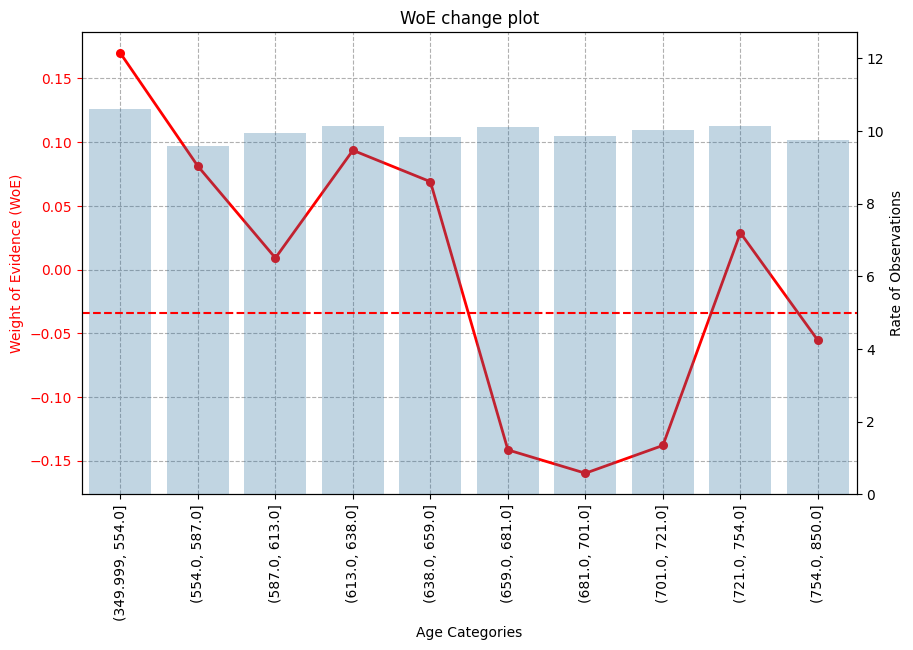

In [362]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='CreditScore_cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Age Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='CreditScore_cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

In [332]:

# Calculate WoE values for Age_Cat
df_woe = WoE_v2(train, 'Age_Cat', 'Exited')

# Create a mapping dictionary from Age_Cat to WoE
woe_mapping = df_woe.set_index('Age_Cat')['WoE'].to_dict()

# Replace Age_Cat values in train with their respective WoE values
train['Age_Cat'] = train['Age_Cat'].map(woe_mapping)
test['Age_Cat'] = test['Age_Cat'].map(woe_mapping)

# Display the updated DataFrame
test

/var/folders/66/x0152m9s4fxg2fz8tfrrqlc80000gp/T/ipykernel_18877/3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE,Tenure_WoE,Gender_coding,Age_Cat
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,-0.304129,-0.103508,1,-1.066051
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,-0.304129,-0.103508,1,1.407184
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,-0.304129,-0.150423,1,-0.808324
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,-0.304129,-0.083872,0,-0.808324
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.821315,0.006746,0,-0.425917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,-0.254970,-0.150423,0,-1.066051
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,-0.304129,0.086490,1,-0.808324
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,-0.304129,-0.103508,0,-1.066051
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,-0.304129,0.101938,1,-1.066051


In [ ]:
np.array[0, 33, 37, 39, 41, 44, 92]

In [346]:
train_key['Age_Cate'] = train['Age_Cat']
test_key['Age_Cat'] = test['Age_Cat']

train_key['Age_Cate'] = train['Age']
test_key['Age_Cate'] = test['Age']
train_key

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_WoE,Tenure_WoE,Gender_coding,Age_Cat,Age_Cate
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,-0.304129,0.101938,0,-1.066051,33.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,-0.304129,0.085042,0,-1.066051,33.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,-0.304129,0.006746,0,0.012582,40.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,-0.304129,-0.103508,0,-0.808324,34.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,-0.254970,0.050000,0,-1.066051,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,-0.254970,-0.103508,1,-1.066051,33.0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,-0.304129,0.101938,0,-0.808324,35.0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,-0.304129,0.050000,0,-1.066051,31.0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,-0.254970,-0.150423,1,-1.066051,30.0


# Scaling

# checking and submission

In [275]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     165034 non-null  int64   
 1   CustomerId             165034 non-null  int64   
 2   Surname                165034 non-null  object  
 3   CreditScore            165034 non-null  int64   
 4   Geography              165034 non-null  object  
 5   Gender                 165034 non-null  object  
 6   Age                    165034 non-null  float64 
 7   Tenure                 165034 non-null  int64   
 8   Balance                165034 non-null  float64 
 9   NumOfProducts          165034 non-null  int64   
 10  HasCrCard              165034 non-null  float64 
 11  IsActiveMember         165034 non-null  float64 
 12  EstimatedSalary        165034 non-null  float64 
 13  Exited                 165034 non-null  int64   
 14  Geography_WoE       

In [295]:
train = train.drop(columns=['id', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Tenure'])
test = test.drop(columns=['id', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Tenure'])

In [355]:
X = train_key.copy()
#y = train_key.pop('Exited')
train['Exited'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [279]:
from sklearn.ensemble import StackingClassifier

# Define base models
estimators = [
    ('lr_l1', LogisticRegression(max_iter=2000, penalty='l1', solver='liblinear', C=0.5)),
    ('lr_l2', LogisticRegression(max_iter=2000, penalty='l2', C=1.0)),
    ('ridge', RidgeClassifier(max_iter=2000))
]

# Define the stacking classifier with Logistic Regression as meta-model
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000, penalty='l2', C=1.0),
    cv=5  # Number of folds for cross-validation
)

# Train the stacking classifier on training data
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate the stacking model
stacking_pred = stacking_clf.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, stacking_pred))

roc_auc = roc_auc_score(y_test, stacking_pred)
print(f"ROC-AUC: {roc_auc}")

Stacking Accuracy: 0.840419300761447
ROC-AUC: 0.6941077984311689


/Users/applebro/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.81237e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/applebro/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.81241e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [349]:

# 9. Model yaratish va o'qitish
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)

# 10. ROC AUC hisoblash
y_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.7137437911125258


In [350]:
# 8. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Model yaratish va o'qitish
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)

# 10. ROC AUC hisoblash
y_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.5437567061391959


In [351]:
# 8. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Model yaratish va o'qitish
model = RidgeClassifier()
model.fit(X_train, y_train)

# 10. ROC AUC hisoblash
y_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.6763953877595001


In [244]:
# Test to'plamida ehtimollarni bashorat qilish
logistic_pipeline= RidgeClassifier()
logistic_pipeline.fit(X,y)
y_test_prob = model.predict(test_key)

# 12. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("my_submission_2.csv", index=False)